In [1]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
          "spark.sql.execution.arrow.enabled":"true"
         }
}

[I 2023-02-02 17:00:57,535.535 configure_magic] Magic cell payload received: {"conf": {"spark.pyspark.python": "python3", "spark.pyspark.virtualenv.enabled": "true", "spark.pyspark.virtualenv.type": "native", "spark.pyspark.virtualenv.bin.path": "/usr/bin/virtualenv", "spark.sql.execution.arrow.enabled": "true"}, "proxyUser": "assumed-role_fdp_blitvin-Isengard"}

[I 2023-02-02 17:00:57,535.535 configure_magic] Sending request to update kernel. Please wait while the kernel will be refreshed.


The kernel is successfully refreshed.

In [2]:
%pip install alpaca-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pyfolio

     |████████████████████████████████| 91 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 109 kB 90.2 MB/s eta 0:00:01
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=90049 sha256=6ae75cfd91ff2f08426402e35cc0aadb61a65736aaafb7c29af08c6741b05ab9
  Stored in directory: /home/hadoop/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=41000 sha256=51a16fb883f96dd3a1ac4ef53e2269d6921cf55c1b8fbb3c70f1da1557c36d33
  Stored in directory: /home/hadoop/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pyEX as p
import requests
import json
import pandas as pd
import numpy as np
#import vectorbt as vbt
import matplotlib.pyplot as plt 
import itertools 
import datetime 
import awswrangler as wr
import vectorbt as vbt
import pyspark.sql.functions as py_f
import pyspark.sql.types as py_t
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from alpaca.data.requests import StockBarsRequest
import pyarrow as pa
import pyarrow.parquet as pq

isSandbox = False
if isSandbox:
    token ='Tpk_02dcd2036e7641b880dd4cbb01fa9c67'
    iex_ver = 'sandbox'
else:
    #token ='pk_2e94555e43da4135a6032433c6b18fa5'
    token ='pk_79d147436c1349f3abbec37591323e52'
    iex_ver = 'stable'
pyEX_cl = p.Client(api_token=token)
timeframe='max'

/usr/local/lib/python3.7/site-packages/tzlocal/unix.py:177: UserWarning: Can not find any timezone configuration, defaulting to UTC.
  warnings.warn("Can not find any timezone configuration, defaulting to UTC.")


In [9]:


ALPACA_API_KEY_ID = 'AK8MWGDK1GMSP91W1SGM'
ALPACA_API_SECRET_KEY = 'oM5h4WWGfuKrctHWdCmtpwLcOuoV5TLemJ5ImavI'
etf_parquet_file = 's3://fsidatalake/intraday_market_data/etf_30mins.parquet'

In [10]:
if False:
    fx_etf_symbols = ['FXA','FXY','FXE','FXB','UUP','FXC','FXF',]
    bitcoin_etf_symbols = ['BITO']
    commod_etf_symbols = ['USO','GLD','DBA','DBB','SLV',]
    fi_etf_symbols = ['IAGG','AGG','IHY','EMLC','HYG',]
    equity_etf_symbols = ['AMJ','AMLP','ARKF','ARKG','ARKK','ARKQ','ARKW','BOTZ','BUG','CGW','CIBR','COPX','CRBN','DRIV','EFV','EMLP','FBT','FDN','FIVG',
    'FIW','FTXG','GDX','GNR','GUNR','HACK','IAT','IBB','ICLN','IEO','IFRA','IGE','IGF','IGM','IGV','IHF','IHI','ITB','ITZ','IWD','IWN','IWS','IYT','JETS','KBWB',
                          'KOMP','KRE','KWEB','LCTU','LIT','MLPA',
    'MLPX','MOO','NFRA','OIH','PABU','PAVE','PBW','PEJ','PHO','PICK','PPA','QCLN','REET','REMX','ROBO','SCHH','SIL','SKYY','SMH','SOXX','SRVR','TAN','URA','URNM',
                          'VUG','XAR','XBI','XHB','XME','XOP','XSD','QQQ','EWZ','AAXJ','VTI','EWJ','EWA','EWC','MCHI','EWU','EWQ','EWG','FM','EIS']
    sectors = ['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']
    bench_symbol=['SPY','QQQ','IVV']
    all_symbols =fx_etf_symbols+bitcoin_etf_symbols+commod_etf_symbols+fi_etf_symbols+equity_etf_symbols+bench_symbol+sectors
    #all_symbols
    columns_to_capture = ['close','open','symbol']
    data_folder = 's3://fsidatalake/eod_market_data/etf_trend_following/'
    parquet_file_out =f"{data_folder}/etf_market_data.parquet"

In [11]:
#import boto3
#dynamodb = boto3.resource('dynamodb')
#financial_indexes = dynamodb.Table('financial_indexes')
#financial_indexes.get_item(Key={"symbol":{"S":"SPY"}})
#syms=pd.DataFrame([{'symbol':'SPY'}])
#ret_df= get_new_data_df(syms)
#ret_df

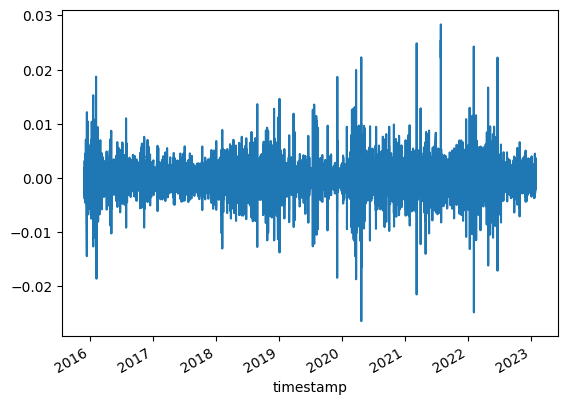

In [ ]:
def get_data_plot_spread(t1,t2):
    goog_full_pd=get_new_data_df_alpaca([t1],start_date="2000-01-02")
    googl_full_pd=get_new_data_df_alpaca([t2],start_date="2000-01-02")
    goog_spread_pd=googl_full_pd.set_index('timestamp').join(goog_full_pd.set_index('timestamp'),lsuffix='_t1', rsuffix='_t2').dropna()
    goog_spread_pd['close_spread']=goog_spread_pd['close_t1'].pct_change()-goog_spread_pd['close_t2'].pct_change()
    goog_spread_pd['close_spread'].rolling(8).sum().plot()
    return(goog_spread_pd)
    
goog_googl=get_data_plot_spread('GOOG','GOOGL')

<AxesSubplot:xlabel='timestamp'>

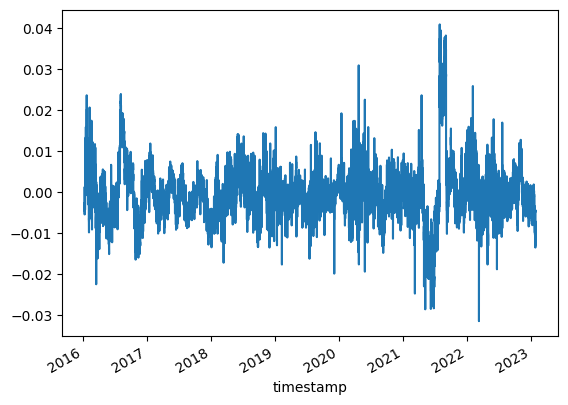

In [58]:
goog_googl['close_spread'].rolling(16*30).sum().plot()

<AxesSubplot:xlabel='timestamp'>

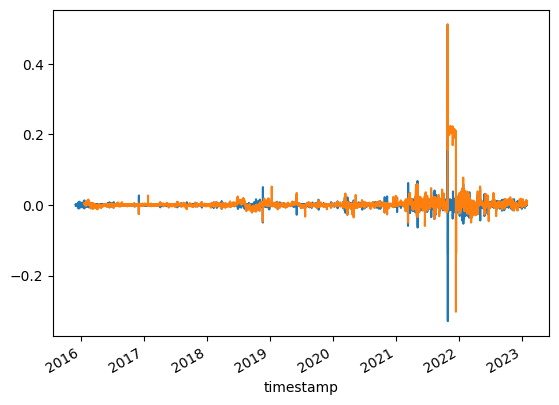

In [59]:
brka_brkb=get_data_plot_spread('BRK.B','BRK.A')

<AxesSubplot:xlabel='timestamp'>

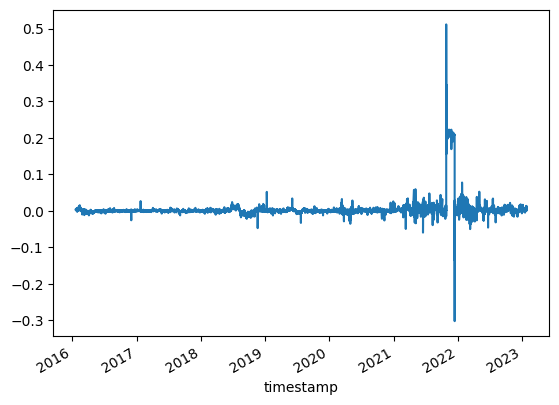

In [60]:
brka_brkb['close_spread'].rolling(16*30).sum().plot()

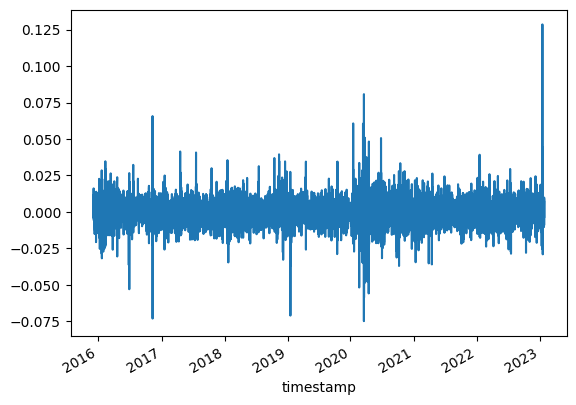

In [61]:
gs_ms=get_data_plot_spread('GS','MS')

<AxesSubplot:xlabel='timestamp'>

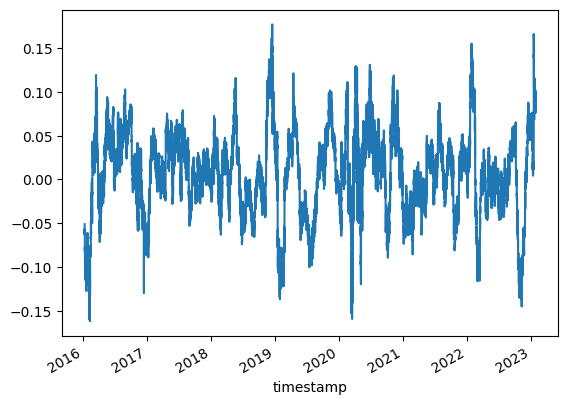

In [62]:
gs_ms['close_spread'].rolling(16*30).sum().plot()

In [13]:
def get_new_data_df_alpaca(symbol,start_date="2015-01-02",end_date="2023-01-30"):
    if type(symbol)==list:
        symbols=symbol
    else:
        local_syms=str(symbol.values[0][0])
        symbols=[local_syms]
    
    ALPACA_API_KEY_ID = 'AK8MWGDK1GMSP91W1SGM'
    ALPACA_API_SECRET_KEY = 'oM5h4WWGfuKrctHWdCmtpwLcOuoV5TLemJ5ImavI'
    data_client = StockHistoricalDataClient(ALPACA_API_KEY_ID, ALPACA_API_SECRET_KEY)

    # Set parameters

    start_date = pd.to_datetime(start_date).tz_localize('America/New_York')
    end_date = pd.to_datetime(end_date).tz_localize('America/New_York')

    timeframe_30_min = TimeFrame(30, TimeFrameUnit.Minute)

    request_parameters = StockBarsRequest(
                    symbol_or_symbols=symbols,
                    timeframe=timeframe_30_min,
                    start=start_date,
                    end=end_date,
                    )

    # Fetch data and convert to dataframe
    min_30_bars = data_client.get_stock_bars(request_parameters).df.reset_index()
    min_30_bars['date']=min_30_bars.timestamp.dt.date
    min_30_bars['minute'] = (min_30_bars.timestamp.dt.hour.astype(str).str.pad(2,fillchar='0'))+":"+(min_30_bars.timestamp.dt.minute.astype(str).str.pad(2,fillchar='0'))
    return(min_30_bars)
sym_list=['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU','SPY',
          'QQQ','VTI','VTV','BND','AGG','VUG','VIG','IJR','IJH','IEMG','IWF','IWD','GLD','IWM','VYM','VXUS','VO','EFA','SCHD','ARKK']
if False:
    etf_pd = get_new_data_df_alpaca(sym_list)

#syms=pd.DataFrame([{'symbol':'XLC'}])
#etf_pd = get_new_data_df_alpaca(syms)

In [8]:
etf_df= spark.createDataFrame(etf_pd.reset_index())

etf_df.write\
            .option("header",True)\
            .partitionBy('symbol')\
            .mode("overwrite")\
            .parquet(etf_parquet_file)

In [ ]:
#@py_f.pandas_udf("date timestamp, close double, open double, symbol string", py_f.PandasUDFType.GROUPED_MAP)
#@py_f.pandas_udf("symbol string", py_f.PandasUDFType.GROUPED_MAP)
#syms=pd.DataFrame([{'symbol':'SPY'}])
#get_new_data_df(syms)
def get_new_data_df(symbol):
    local_sym=str(symbol.values[0][0])
    try:
        hwm_l=highwatermark_pd_bc.value
        columns_to_capture=columns_to_capture_bc.value
        iex_base_url=iex_base_url_bc.value
        sym_pd = hwm_l.query(f"symbol=='{local_sym}'")
        if len(sym_pd)>0:
            max_date = sym_pd['max_date'].iloc[0]
        else:
            max_date = datetime.datetime.now()-datetime.timedelta(days=365*50)
        last_days=(datetime.datetime.now()-max_date).days

        pyEX_cl = p.Client(api_token=iex_token_bc.value)
        final_url = iex_base_url.format(local_sym,iex_token_bc.value,int(last_days))
        #'https://cloud.iexapis.com/stable/stock/{}/chart/max?token={}&chartIEXOnly=true&chartLast={}'
        print(final_url)
        res = requests.get(final_url)
        ret_pd = pd.DataFrame(json.loads(res.text))#[columns_to_capture]
        ret_pd=ret_pd.query(f"date>'{max_date.strftime('%Y-%m-%d')}'")
        ret_pd['date']=pd.to_datetime(ret_pd['date'])
        ret_pd['symbol']=local_sym
        for one_col in ['open','high','low','close']:
            ret_pd[f'market{one_col.capitalize()}'] = np.where(ret_pd[f'market{one_col.capitalize()}'].isnull(),ret_pd[one_col],ret_pd[f'market{one_col.capitalize()}'] )
            ret_pd[one_col] = np.where(ret_pd[one_col].isnull(),ret_pd[f'market{one_col.capitalize()}'],ret_pd[one_col] )
        #return(ret_pd[columns_to_capture].query(f"date>'{max_date}'"))
    except:
        ret_pd=pd.DataFrame([{'date': datetime.datetime.now()-datetime.timedelta(days=365*50),
                              'minute':None,
                              'open':None,
                              'high':None,
                              'low':None,
                              'close':None,
                              'notional':None,
                              'numberOfTrades':None,
                              'symbol': local_sym,
                              'marketOpen':None,
                              'marketHigh':None,
                              'marketLow':None,
                              'marketClose':None,
                              'marketNotional':None,
                              'marketNumberOfTrades':None
                             }])
    #return(ret_pd[columns_to_capture],max_date,hwm_l,local_sym,sym_pd)
    return(ret_pd[columns_to_capture])
    #return(pd.DataFrame([res.text],columns=['symbol']))
  

In [15]:
refresh_data =False
class MarketDataGateway():
    def __init__(self,isSandbox=False):
        self.fx_etf_symbols = ['FXA','FXY','FXE','FXB','UUP','FXC','FXF',]
        self.bitcoin_etf_symbols = ['BITO','BTF','XBTF','BITS','GBTC','BITW','BLOK','BLCN','LEGR','SPBC','BITQ','BKCH','DAPP','BTCFX']
        self.bitcoin_equity_proxy_symbols = ['COIN','MSTR']
        self.crypto_mining_symbols = ['RIOT','CAN','HUT','HIVE','MARA','BTCM','BTBT','BITF']
        self.commod_etf_symbols = ['USO','GLD','DBA','DBB','SLV',]
        self.fi_etf_symbols = ['IAGG','AGG','IHY','EMLC','HYG',]
        self.equity_etf_symbols = ['AMJ','AMLP','ARKF','ARKG','ARKK','ARKQ','ARKW','BOTZ','BUG','CGW','CIBR','COPX','CRBN','DRIV','EFV','EMLP','FBT','FDN','FIVG',
                'FIW','FTXG','GDX','GNR','GUNR','HACK','IAT','IBB','ICLN','IEO','IFRA','IGE','IGF','IGM','IGV','IHF','IHI','ITB','ITZ','IWD','IWN','IWS','IYT','JETS','KBWB',
                      'KOMP','KRE','KWEB','LCTU','LIT','MLPA',
                    'MLPX','MOO','NFRA','OIH','PABU','PAVE','PBW','PEJ','PHO','PICK','PPA','QCLN','REET','REMX','ROBO','SCHH','SIL','SKYY','SMH','SOXX','SRVR','TAN','URA','URNM',
                      'VUG','XAR','XBI','XHB','XME','XOP','XSD','QQQ','EWZ','AAXJ','VTI','EWJ','EWA','EWC','MCHI','EWU','EWQ','EWG','FM','EIS']
        self.sectors = ['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']
        self.sp500 = [ "AAPL","MSFT",
  "AMZN",
  "GOOGL",
  "BRK.B",
  "GOOG",
  "NVDA",
  "TSLA",
  "XOM",
  "UNH",
  "JNJ",
  "JPM",
  "V",
  "META",
  "PG",
  "HD",
  "CVX",
  "MA",
  "LLY",
  "MRK",
  "ABBV",
  "BAC",
  "PFE",
  "AVGO",
  "KO",
  "PEP",
  "TMO",
  "COST",
  "WMT",
  "DIS",
  "MCD",
  "CSCO",
  "ABT",
  "WFC",
  "ACN",
  "DHR",
  "ADBE",
  "CMCSA",
  "VZ",
  "CRM",
  "PM",
  "NKE",
  "NFLX",
  "LIN",
  "TXN",
  "COP",
  "BMY",
  "NEE",
  "QCOM",
  "RTX",
  "T",
  "HON",
  "CAT",
  "ORCL",
  "AMGN",
  "UPS",
  "MS",
  "LOW",
  "SBUX",
  "UNP",
  "SPGI",
  "IBM",
  "AMD",
  "GS",
  "PLD",
  "INTU",
  "BA",
  "ELV",
  "INTC",
  "CVS",
  "DE",
  "BLK",
  "SCHW",
  "MDT",
  "LMT",
  "GILD",
  "AXP",
  "AMT",
  "C",
  "AMAT",
  "BKNG",
  "TJX",
  "CB",
  "CI",
  "PYPL",
  "NOW",
  "ADP",
  "GE",
  "ADI",
  "MDLZ",
  "TMUS",
  "ISRG",
  "MMC",
  "SYK",
  "VRTX",
  "SLB",
  "REGN",
  "MO",
  "EOG",
  "PGR",
  "DUK",
  "TGT",
  "ZTS",
  "SO",
  "BDX",
  "APD",
  "MU",
  "FISV",
  "EQIX",
  "AON",
  "LRCX",
  "USB",
  "PNC",
  "BSX",
  "TFC",
  "ITW",
  "ETN",
  "FCX",
  "MMM",
  "NOC",
  "CCI",
  "CSX",
  "CME",
  "MRNA",
  "EL",
  "MPC",
  "HUM",
  "ICE",
  "CL",
  "WM",
  "KLAC",
  "PXD",
  "NSC",
  "VLO",
  "HCA",
  "ATVI",
  "SNPS",
  "MCK",
  "GM",
  "SHW",
  "DG",
  "EMR",
  "F",
  "PSX",
  "D",
  "GD",
  "SRE",
  "CDNS",
  "MCO",
  "OXY",
  "EW",
  "ORLY",
  "MET",
  "AEP",
  "NXPI",
  "JCI",
  "PSA",
  "AIG",
  "MAR",
  "APH",
  "A",
  "GIS",
  "ROP",
  "ADM",
  "CTVA",
  "FDX",
  "ADSK",
  "AZO",
  "COF",
  "FIS",
  "TRV",
  "CMG",
  "NUE",
  "KMB",
  "HES",
  "CNC",
  "O",
  "IQV",
  "MCHP",
  "DVN",
  "CHTR",
  "MSI",
  "DOW",
  "NEM",
  "BIIB",
  "MSCI",
  "AFL",
  "SPG",
  "DXCM",
  "ROST",
  "EXC",
  "TT",
  "PH",
  "AJG",
  "IDXX",
  "LHX",
  "TEL",
  "SYY",
  "HLT",
  "MNST",
  "PCAR",
  "PRU",
  "WMB",
  "CTAS",
  "XEL",
  "ECL",
  "STZ",
  "AMP",
  "KMI",
  "HAL",
  "DD",
  "BK",
  "CARR",
  "TDG",
  "YUM",
  "PAYX",
  "WELL",
  "CMI",
  "ALL",
  "FTNT",
  "MTD",
  "OTIS",
  "EA",
  "CTSH",
  "ED",
  "ILMN",
  "STT",
  "ALB",
  "RMD",
  "AME",
  "ROK",
  "VICI",
  "WBD",
  "HSY",
  "DFS",
  "DLR",
  "KEYS",
  "ON",
  "CSGP",
  "DLTR",
  "BKR",
  "KHC",
  "GPN",
  "SBAC",
  "ANET",
  "OKE",
  "ODFL",
  "DHI",
  "URI",
  "PEG",
  "APTV",
  "PPG",
  "KDP",
  "KR",
  "WEC",
  "CPRT",
  "AWK",
  "IFF",
  "FAST",
  "ENPH",
  "CEG",
  "VRSK",
  "ES",
  "GLW",
  "WTW",
  "MTB",
  "CBRE",
  "EBAY",
  "FANG",
  "EFX",
  "WBA",
  "ABC",
  "HPQ",
  "ZBH",
  "EIX",
  "ULTA",
  "IT",
  "TROW",
  "CDW",
  "PCG",
  "GWW",
  "FRC",
  "LEN",
  "GEHC",
  "WY",
  "RSG",
  "TSCO",
  "AVB",
  "FITB",
  "HIG",
  "DAL",
  "LYB",
  "VMC",
  "ARE",
  "FTV",
  "ACGL",
  "GPC",
  "BAX",
  "ANSS",
  "LH",
  "AEE",
  "FE",
  "IR",
  "ETR",
  "RF",
  "DTE",
  "PPL",
  "RJF",
  "LUV",
  "PFG",
  "HBAN",
  "MLM",
  "EQR",
  "CFG",
  "PWR",
  "EXR",
  "HPE",
  "HOLX",
  "DOV",
  "STE",
  "NDAQ",
  "VTR",
  "VRSN",
  "CTRA",
  "CAH",
  "NTRS",
  "WAT",
  "STLD",
  "WST",
  "ALGN",
  "EPAM",
  "TDY",
  "LVS",
  "CHD",
  "TSN",
  "MPWR",
  "INVH",
  "MAA",
  "WAB",
  "MKC",
  "CNP",
  "XYL",
  "DRI",
  "BALL",
  "MRO",
  "CMS",
  "AMCR",
  "IEX",
  "TTWO",
  "FSLR",
  "SWKS",
  "AES",
  "BR",
  "EXPD",
  "SIVB",
  "KEY",
  "MOH",
  "OMC",
  "PKI",
  "K",
  "EXPE",
  "CAG",
  "ETSY",
  "BBY",
  "CLX",
  "MOS",
  "TRGP",
  "DGX",
  "SEDG",
  "COO",
  "CINF",
  "SYF",
  "FMC",
  "CF",
  "ZBRA",
  "TER",
  "SJM",
  "ATO",
  "UAL",
  "INCY",
  "FDS",
  "JBHT",
  "IRM",
  "NVR",
  "J",
  "PAYC",
  "AVY",
  "FLT",
  "TXT",
  "GRMN",
  "MTCH",
  "POOL",
  "LKQ",
  "APA",
  "HWM",
  "PEAK",
  "NTAP",
  "TRMB",
  "ESS",
  "VTRS",
  "PTC",
  "LW",
  "WRB",
  "MKTX",
  "EVRG",
  "WDC",
  "RCL",
  "IPG",
  "KIM",
  "AKAM",
  "RE",
  "IP",
  "TYL",
  "LNT",
  "STX",
  "MGM",
  "BRO",
  "JKHY",
  "LDOS",
  "GEN",
  "HST",
  "SNA",
  "PKG",
  "HRL",
  "NDSN",
  "CPT",
  "CBOE",
  "UDR",
  "DPZ",
  "SWK",
  "TECH",
  "CRL",
  "PHM",
  "CHRW",
  "BF.B",
  "EQT",
  "CE",
  "HSIC",
  "L",
  "PARA",
  "QRVO",
  "MAS",
  "LYV",
  "TFX",
  "KMX",
  "CZR",
  "NI",
  "CDAY",
  "TPR",
  "BWA",
  "GL",
  "WYNN",
  "CCL",
  "EMN",
  "AAL",
  "FOXA",
  "BXP",
  "CPB",
  "JNPR",
  "BIO",
  "BBWI",
  "REG",
  "ALLE",
  "VFC",
  "UHS",
  "WRK",
  "TAP",
  "CTLT",
  "CMA",
  "RHI",
  "AAP",
  "FFIV",
  "HII",
  "PNR",
  "WHR",
  "BEN",
  "ROL",
  "PNW",
  "IVZ",
  "FRT",
  "ZION",
  "XRAY",
  "NWSA",
  "SEE",
  "SBNY",
  "NRG",
  "AOS",
  "OGN",
  "HAS",
  "GNRC",
  "AIZ",
  "DXC",
  "ALK",
  "NCLH",
  "MHK",
  "NWL",
  "LNC",
  "RL",
  "LUMN",
  "FOX",
  "DVA",
  "DISH",
  "NWS"
 ]
        self.bench_symbol=['SPY','QQQ','IVV']
        self.all_symbols =self.fx_etf_symbols+\
                            self.bitcoin_etf_symbols+\
                            self.commod_etf_symbols+\
                            self.bitcoin_equity_proxy_symbols+\
                            self.crypto_mining_symbols+\
                            self.fi_etf_symbols+\
                            self.equity_etf_symbols+\
                            self.bench_symbol+\
                            self.sectors+\
                            self.sp500
        self.all_symbols_df = spark.createDataFrame(pd.DataFrame(self.all_symbols,columns=['symbol']))
        #all_symbols
        self.columns_to_capture = ['date','minute','open','high','low','close','notional','numberOfTrades','symbol'
                                   ,'marketOpen','marketHigh','marketLow','marketClose','marketNotional','marketNumberOfTrades']
        self.type_excl_field_map = {'date':'timestamp','minute':'string','symbol':'string'}
        self.pandas_udf_schema =[f"{i} double" for i in self.columns_to_capture if (i not in self.type_excl_field_map.keys()) ] +\
                                    [f"{i[0]} {i[1]}" for i in self.type_excl_field_map.items()]
        
        self.data_folder = 's3://fsidatalake/intraday_market_data/'
        self.parquet_file_out =f"{self.data_folder}/OHLC_30m.parquet"
        if isSandbox:
            self.iex_token ='Tpk_02dcd2036e7641b880dd4cbb01fa9c67'
            self.iex_ver = 'sandbox'
        else:
            #self.iex_token ='pk_2e94555e43da4135a6032433c6b18fa5' pk_79d147436c1349f3abbec37591323e52
            self.iex_token ='pk_79d147436c1349f3abbec37591323e52' 
            self.iex_ver = 'stable'
        self.iex_base_url = 'https://cloud.iexapis.com/'+self.iex_ver+'/stock/{}/chart/1mm?token={}&chartIEXOnly=true'
        
    def set_highwatermarks(self):
        try:
            self.old_df = spark.read.parquet(self.parquet_file_out)
        except:
            #self.old_df = spark.createDataFrame(pd.DataFrame([{'symbol':'----','date':datetime.datetime.now()-datetime.timedelta(days=365*50)}]))
            self.old_pd=self.all_symbols_df.toPandas()
            self.old_pd['date']=datetime.datetime.now()-datetime.timedelta(days=365*50)
            self.old_df= spark.createDataFrame(self.old_pd)
        self.highwatermark_pd = self.old_df.groupby('symbol').agg(py_f.max("date").alias("max_date"),
                             py_f.min("date").alias("min_date"),
                             (py_f.max("date")-py_f.min("date")).alias("date_length")
                            ).toPandas()
    def set_new_symbol_df(self):
        self.new_sym_df=self.all_symbols_df.groupby("symbol")\
                        .applyInPandas(get_new_data_df, schema= ','.join(self.pandas_udf_schema))\
                        .where('close is not null')
    def write_new_symbol_df(self):
        self.write_stats=self.new_sym_df.groupby('symbol').agg(py_f.count('symbol').alias('data_count'))
        self.new_sym_df.write\
            .option("header",True)\
            .partitionBy('symbol')\
            .mode("append")\
            .parquet(self.parquet_file_out)
    def set_sp500_constituents(self):
        pass
    def rewrite_if_dups(self):
        self.old_df_after_write = spark.read.parquet(self.parquet_file_out)
        self.dup_df = self.old_df_after_write.distinct().groupby('date','symbol').count()
        dup_count=self.dup_df.where('count>1').count()
        if dup_count>0:        
            print(f"found:{dup_count} dups; sample:{self.dup_df.show()}")
            self.old_df_after_write.groupby('date','symbol').agg(py_f.mean('close').alias('close'),py_f.mean('open').alias('open'))\
            .write\
            .option("header",True)\
            .partitionBy('symbol')\
            .mode("overwrite")\
            .parquet(self.parquet_file_out.replace('.parquet','_temp.parquet'))
        else:
            print(f"no dups")
        

mdg=MarketDataGateway()
mdg.set_highwatermarks()
# set bc vars
highwatermark_pd_bc =sc.broadcast(mdg.highwatermark_pd)
columns_to_capture_bc =sc.broadcast(mdg.columns_to_capture)
iex_token_bc =sc.broadcast(mdg.iex_token)
iex_base_url_bc =sc.broadcast(mdg.iex_base_url)
# set bc vars
if refresh_data:
    mdg.set_new_symbol_df()
    mdg.write_new_symbol_df()
    print(mdg.write_stats.toPandas().sort_values(['symbol']))
#mdg.rewrite_if_dups()

In [16]:

old_df_after_write = spark.read.parquet(mdg.parquet_file_out)
dup_df = old_df_after_write.groupby('date','minute','symbol').count()
dup_count=dup_df.where('count>1').count()
dup_count
dup_df.toPandas().query("symbol=='AMZN'")

,date,minute,symbol,count
8832,2023-01-17,12:30,AMZN,1
8861,2023-01-19,15:30,AMZN,1
8893,2023-01-23,15:30,AMZN,1
8899,2023-01-27,15:00,AMZN,1
8949,2023-01-11,13:30,AMZN,1
...,...,...,...,...
119256,2023-01-24,12:00,AMZN,1
119271,2023-01-24,14:30,AMZN,1
119290,2023-01-18,13:00,AMZN,1
119329,2023-01-09,15:30,AMZN,1


In [17]:
if False:
    sym_sample=spark.read.parquet(mdg.parquet_file_out)
else:
    sym_sample=spark.read.parquet(etf_parquet_file)
sym_sample.count()

663667

In [18]:
sym_sample_pd = sym_sample.toPandas().drop(columns=['index'])#spy_full_pd#sym_sample.toPandas().drop(columns=['index'])

In [19]:
sym_sample_pd

,timestamp,open,high,low,close,volume,trade_count,vwap,date,minute,symbol
0,2019-01-02 09:00:00,131.68,131.92,131.680,131.9100,3330.0,11.0,131.753273,2019-01-02,09:00,IWM
1,2019-01-02 09:30:00,132.06,132.16,131.970,132.1500,5225.0,17.0,132.032632,2019-01-02,09:30,IWM
2,2019-01-02 10:00:00,132.18,132.18,132.090,132.0900,607.0,4.0,132.134547,2019-01-02,10:00,IWM
3,2019-01-02 10:30:00,132.00,132.28,132.000,132.2800,1500.0,4.0,132.110000,2019-01-02,10:30,IWM
4,2019-01-02 11:00:00,132.27,132.41,132.250,132.4100,7010.0,13.0,132.304836,2019-01-02,11:00,IWM
...,...,...,...,...,...,...,...,...,...,...,...
663662,2023-01-27 19:00:00,159.05,159.32,159.050,159.2900,185488.0,718.0,159.252101,2023-01-27,19:00,IWD
663663,2023-01-27 19:30:00,159.28,159.53,159.280,159.4700,102424.0,725.0,159.380573,2023-01-27,19:30,IWD
663664,2023-01-27 20:00:00,159.48,159.67,159.295,159.4699,114444.0,1120.0,159.493158,2023-01-27,20:00,IWD
663665,2023-01-27 20:30:00,159.49,159.55,158.830,158.8750,189101.0,1931.0,159.190673,2023-01-27,20:30,IWD


In [20]:
sym_sample_pd['open_close']=((sym_sample_pd['close']/sym_sample_pd['open']-1))*100#+(sym_sample_pd['marketClose']/sym_sample_pd['marketOpen']-1))/2
bench_sym='SPY'
bench_pd = sym_sample_pd.query(f"symbol=='{bench_sym}'")
join_cols = ['timestamp','date','minute']
bench_pd.columns=[f'{i}_bench' if i not in join_cols else i for i in bench_pd.columns ]
sym_sample_pd_tmp= bench_pd.set_index(join_cols).join(sym_sample_pd.set_index(join_cols))

sym_sample_first_last=sym_sample_pd_tmp.query('minute=="09:30" or minute=="15:30"')

sym_pd_pivot=pd.pivot_table(sym_sample_first_last,values=['open_close','open','close','open_close_bench','open_bench','close_bench'],
                            index=['symbol','date'],columns=['minute'],aggfunc='mean').dropna()
sym_pd_pivot.columns = sym_pd_pivot.columns.to_series().str.join('_')
sym_pd_pivot['day_change']=((sym_pd_pivot['close_15:30']/sym_pd_pivot['close_09:30']-1))*100
sym_pd_pivot['day_change_bench']=((sym_pd_pivot['close_bench_15:30']/sym_pd_pivot['close_bench_09:30']-1))*100

sym_pd_pivot['day_vs_bench_change']=sym_pd_pivot['day_change']-sym_pd_pivot['day_change_bench']
sym_pd_pivot['open_close_vs_bench_09:30']=sym_pd_pivot['open_close_09:30']-sym_pd_pivot['open_close_bench_09:30']
sym_pd_pivot['open_close_vs_bench_15:30']=sym_pd_pivot['open_close_15:30']-sym_pd_pivot['open_close_bench_15:30']

sym_pd_pivot['open_close_09:30_SIGN'] = [1 if x > 0 else (0 if x==0 else -1) for x in sym_pd_pivot['open_close_09:30']]
sym_pd_pivot['open_close_15:30_SIGN'] = [1 if x > 0 else (0 if x==0 else -1) for x in sym_pd_pivot['open_close_15:30']]
sym_pd_pivot['open_close_vs_bench_09:30_SIGN'] = [1 if x > 0 else (0 if x==0 else -1) for x in sym_pd_pivot['open_close_vs_bench_09:30']]
sym_pd_pivot['open_close_vs_bench_15:30_SIGN'] = [1 if x > 0 else (0 if x==0 else -1) for x in sym_pd_pivot['open_close_vs_bench_15:30']]
sym_pd_pivot['day_change_SIGN'] = [1 if x > 0 else (0 if x==0 else -1) for x in sym_pd_pivot['day_change']]
sym_pd_pivot['day_change_vs_bench_SIGN'] = [1 if x > 0 else (0 if x==0 else -1) for x in sym_pd_pivot['day_vs_bench_change']]

sym_pd_pivot['open_close_pnl']= ((sym_pd_pivot['open_close_09:30_SIGN']==sym_pd_pivot['open_close_15:30_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))*abs(sym_pd_pivot['open_close_15:30'])+\
                                ((sym_pd_pivot['open_close_09:30_SIGN']!=sym_pd_pivot['open_close_15:30_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))*abs(sym_pd_pivot['open_close_15:30'])*-1
sym_pd_pivot['day_change_pnl']= ((sym_pd_pivot['open_close_09:30_SIGN']==sym_pd_pivot['day_change_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))*abs(sym_pd_pivot['day_change'])+\
                                ((sym_pd_pivot['open_close_09:30_SIGN']!=sym_pd_pivot['day_change_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))*abs(sym_pd_pivot['day_change'])*-1
sym_pd_pivot['open_close_ind']= ((sym_pd_pivot['open_close_09:30_SIGN']==sym_pd_pivot['open_close_15:30_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))+\
                                ((sym_pd_pivot['open_close_09:30_SIGN']!=sym_pd_pivot['open_close_15:30_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))*-1
sym_pd_pivot['day_change_ind']= ((sym_pd_pivot['open_close_09:30_SIGN']==sym_pd_pivot['day_change_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))+\
                                ((sym_pd_pivot['open_close_09:30_SIGN']!=sym_pd_pivot['day_change_SIGN'])*(sym_pd_pivot['open_close_09:30_SIGN']!=0))*-1

sym_pd_pivot['open_close_vs_bench_pnl']= ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']==sym_pd_pivot['open_close_vs_bench_15:30_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))*abs(sym_pd_pivot['open_close_vs_bench_15:30'])+\
                                         ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=sym_pd_pivot['open_close_vs_bench_15:30_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))*abs(sym_pd_pivot['open_close_vs_bench_15:30'])*-1
sym_pd_pivot['day_change_vs_bench_pnl']= ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']==sym_pd_pivot['day_change_vs_bench_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))*abs(sym_pd_pivot['day_vs_bench_change'])+\
                                         ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=sym_pd_pivot['day_change_vs_bench_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))*abs(sym_pd_pivot['day_vs_bench_change'])*-1
sym_pd_pivot['open_close_vs_bench_ind']= ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']==sym_pd_pivot['open_close_vs_bench_15:30_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))+\
                                         ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=sym_pd_pivot['open_close_vs_bench_15:30_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))*-1
sym_pd_pivot['day_change_vs_bench_ind']= ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']==sym_pd_pivot['day_change_vs_bench_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))+\
                                         ((sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=sym_pd_pivot['day_change_vs_bench_SIGN'])*(sym_pd_pivot['open_close_vs_bench_09:30_SIGN']!=0))*-1

In [21]:
strat_stats = sym_pd_pivot.reset_index().groupby(['symbol','open_close_09:30_SIGN']).agg(
    {'open_close_pnl':['count','mean','sum'],
     'day_change':['mean','sum'],
     #'open_close_vs_bench_pnl':['mean','sum'],
     #'day_change_vs_bench_pnl':['mean','sum'],
     'open_close_vs_bench_ind':['mean','sum'],
     'day_change_vs_bench_ind':['mean','sum'],
     'open_close_ind':['mean','sum'],
     'day_change_ind':['mean','sum'],
     'date':['min','max']}
                                                )
strat_stats.columns = strat_stats.columns.to_series().str.join('_')
strat_stats.query(f"open_close_pnl_count>100").sort_index().style

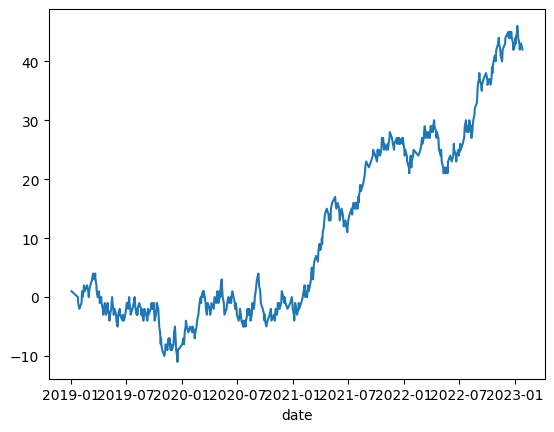

In [33]:
for symbol_check in ['SPY']:
    sym_pd_pivot[sym_pd_pivot['open_close_09:30_SIGN']==1].query(f'symbol=="{symbol_check}"').reset_index().set_index('date')['open_close_ind'].cumsum().plot()

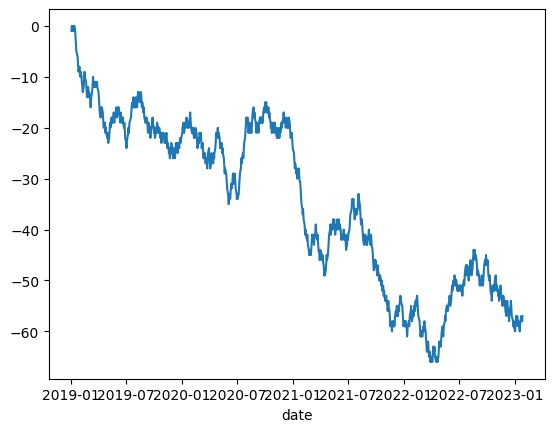

In [29]:
for symbol_check in ['QQQ']:
    sym_pd_pivot[sym_pd_pivot['open_close_09:30_SIGN']!=0].query(f'symbol=="{symbol_check}"').reset_index().set_index('date')['day_change_vs_bench_ind'].cumsum().plot()

In [24]:
import pyfolio as pf

ModuleNotFoundError: No module named 'pyfolio'

In [186]:
pf.create_returns_tear_sheet(sym_pd_pivot[sym_pd_pivot['open_close_09:30_SIGN']==1].query(f'symbol=="{"SPY"}"').reset_index().set_index('date')['day_change_pnl']/100)

Start date,2015-12-02
End date,2023-01-27
Total months,44
,Backtest
Annual return,4.0%
Cumulative returns,15.7%
Annual volatility,11.6%
Sharpe ratio,0.40
Calmar ratio,0.29
Stability,0.37
Max drawdown,-13.8%


AttributeError: 'datetime.date' object has no attribute 'to_pydatetime'

In [88]:
sym_pd_pivot.query(f'symbol=="{"SPY"}"').reset_index().set_index('date')['day_change_pnl']

date
2019-01-02    1.113233
2019-01-03   -0.393797
2019-01-04    0.000000
2019-01-07    0.000000
2019-01-08   -0.366064
                ...   
2023-01-23    1.041035
2023-01-24    0.000000
2023-01-25   -0.664051
2023-01-26   -0.122243
2023-01-27    0.125235
Name: day_change_pnl, Length: 1025, dtype: float64

In [138]:
sym_pd_pivot.to_csv()

close_09:30  close_15:30  close_bench_09:30  \
symbol date                                                      
AGG    2019-03-12       107.44     107.4901             278.92   
       2019-11-21       112.97     112.8669             310.41   
       2020-10-28       117.43     117.8050             333.84   
       2021-01-28       117.97     117.4500             371.58   
       2021-04-19       114.54     114.4650             416.50   
...                        ...          ...                ...   
XLY    2022-10-07       145.66     141.3000             373.41   
       2022-11-01       144.57     142.8500             389.51   
       2022-12-21       131.67     132.2700             383.17   
       2023-01-03       130.01     128.6900             386.83   
       2023-01-05       130.59     128.6100             383.60   

                   close_bench_15:30  open_09:30  open_15:30  \
symbol date                                                    
AGG    2019-03-12           279.9500      107.44    107.5133   
       2019-11-21           310.0700      112.97    112.8300   
       2020-10-28           329.6901      117.43    117.7915   
       2021-01-28           379.7800      117.97    117.4500   
       2021-04-19           414.8400      114.54    114.4750   
...                              ...         ...         ...   
XLY    2022-10-07           365.2900      145.66    141.6600   
       2022-11-01           384.5400      144.57    143.0400   
       2022-12-21           386.5800      131.67    131.5200   
       2023-01-03           382.0400      130.01    128.2250   
       2023-01-05           379.3900      130.55    128.9200   

                   open_bench_09:30  open_bench_15:30  open_close_09:30  \
symbol date                                                               
AGG    2019-03-12            279.21          279.3500           0.00000   
       2019-11-21            310.34          309.6700           0.00000   
       2020-10-28            334.03          328.3500           0.00000   
       2021-01-28            370.71          378.8900           0.00000   
       2021-04-19            416.51          415.6400           0.00000   
...                             ...               ...               ...   
XLY    2022-10-07            373.42          365.8400           0.00000   
       2022-11-01            388.94          384.4823           0.00000   
       2022-12-21            383.07          385.1500           0.00000   
       2023-01-03            386.68          380.8900           0.00000   
       2023-01-05            383.34          380.2350           0.03064   

                   open_close_15:30  ...  open_close_09:30_SIGN  \
symbol date                          ...                          
AGG    2019-03-12         -0.021579  ...                      0   
       2019-11-21          0.032704  ...                      0   
       2020-10-28          0.011461  ...                      0   
       2021-01-28          0.000000  ...                      0   
       2021-04-19         -0.008736  ...                      0   
...                             ...  ...                    ...   
XLY    2022-10-07         -0.254130  ...                      0   
       2022-11-01         -0.132830  ...                      0   
       2022-12-21          0.570255  ...                      0   
       2023-01-03          0.362644  ...                      0   
       2023-01-05         -0.240459  ...                      1   

                   open_close_15:30_SIGN  open_close_vs_bench_09:30_SIGN  \
symbol date                                                                
AGG    2019-03-12                     -1                               1   
       2019-11-21                      1                              -1   
       2020-10-28                      1                               1   
       2021-01-28                      0                              -1   
       2021-04-19      